In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.- Data Preparation

In [2]:
fdata = pd.read_csv('data_histories.csv', index_col="dp_folio")
fdata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,locout5,locout10,locout20,locout30,rest_act,rest1,rest5,rest10,rest20,rest30
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,1,1,1,1,0,0,0,0,0,0
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,0,0,0,0,1,3,0,0,0,0
3,F,34,3,Int,Sec,5,1,1,0,0,...,1,-1,-1,-1,0,0,0,-1,-1,-1
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,0,0,0,-1,0,0,0,0,0,0
5,M,42,4,EM,Sec,3,1,2,2,2,...,0,0,0,0,0,0,0,0,0,0


### Functions for clusterization

In [3]:
#Function to clusterize categories of a certain feature, and add the new clusterized feature as a new column
# Clusters should be an input of the form {cluster_A: {categories}, cluster_B: [categories]}
# Ex. obesity = {0:[1,2,3], 1:[4,5,6]}
def clusterizeDiscrete(feature, clusters, new_name, data):
    new_data = data.copy()
    original_list = data.loc[1:1080, feature]
    new_list = []
    for index in original_list.index:
        cat = False
        if original_list[index] == -1 or original_list[index] == "-1":
            new_list.append("N")
            continue
        for cluster in clusters:
            if original_list[index] in clusters[cluster]:
                new_list.append(cluster)
                cat = True
        if cat == False:
            new_list.append("N")
    new_data[new_name] = new_list
    return new_data

# Function to clusterize categories of a certain continous feature, and add the new clusterized feature as a
# new column
# Clusters shoud be an input of the form {cluster_A: {lambdaFunction1}, cluster_B: lambdaFunction2}
def clusterizeContinuous(feature, clusters, new_name, data):
    new_data = data.copy()
    original_list = data.loc[1:1080, feature]
    new_list = []
    for index in original_list.index:
        if original_list[index] == -1 or original_list[index] == "-1":
            new_list.append("N")
            continue
        for cluster in clusters:
            if eval(clusters[cluster])(original_list[index]):
                new_list.append(cluster)
                break
    new_data[new_name] = new_list
    return new_data
        

# Set of auxiliary high-order functions that will evaluate the conditions to binarize a history
def lessThan(num):
    return lambda n: n < num

def lessQThan(num):
    return lambda n: n <= num

def greaterThan(num):
    return lambda n: n > num

def greaterQThan(num):
    return lambda n: n >= num

def between(num1, num2):
    return lambda n: n <= num2 and n >= num1

### Clusters definition and creation

In [4]:
# Clusterize between obese and non obese
obesity = {0:[1,2,3], 1:[4,5,6]}
ndata = clusterizeDiscrete("AIMC", obesity, "obesity", fdata)

# Clusterize between degrees of study (higher degree vs. non higher degree)
degree = {0:["Prim", "Sec", "Bach", "CarTec", "Otro"], 1:["Lic", "Mast", "Doc", "PDoc"]}
ndata = clusterizeDiscrete("id_gestud", degree, "hdegree", ndata)

# Clusterize excercise features
ejer = {"A":"greaterQThan(2.5)", "B":"lessThan(2.5)"}
ndata = clusterizeContinuous("ejer_act", ejer, "ejer0B", ndata)
ndata = clusterizeContinuous("ejer1", ejer, "ejer1B", ndata)
ndata = clusterizeContinuous("ejer5", ejer, "ejer5B", ndata)
ndata = clusterizeContinuous("ejer10", ejer, "ejer10B", ndata)
ndata = clusterizeContinuous("ejer20", ejer, "ejer20B", ndata)
ndata = clusterizeContinuous("ejer30", ejer, "ejer30B", ndata)

# Clusterize stress features
estres = {"A":[4,5], "B":[1,2,3]}
ndata = clusterizeDiscrete("estres_act", estres, "estres0B", ndata)
ndata = clusterizeDiscrete("estres1", estres, "estres1B", ndata)
ndata = clusterizeDiscrete("estres5", estres, "estres5B", ndata)
ndata = clusterizeDiscrete("estres10", estres, "estres10B", ndata)
ndata = clusterizeDiscrete("estres20", estres, "estres20B", ndata)
ndata = clusterizeDiscrete("estres30", estres, "estres30B", ndata)

# Clusterize weight features
peso = {"A":[1,2,3], "B":[4,5]}
ndata = clusterizeDiscrete("peso_act", peso, "peso0B", ndata)
ndata = clusterizeDiscrete("peso1", peso, "peso1B", ndata)
ndata = clusterizeDiscrete("peso5", peso, "peso5B", ndata)
ndata = clusterizeDiscrete("peso10", peso, "peso10B", ndata)
ndata = clusterizeDiscrete("peso20", peso, "peso20B", ndata)
ndata = clusterizeDiscrete("peso30", peso, "peso30B", ndata)

# Clusterize weight features
condi = {"A":[4,5], "B":[1,2,3]}
ndata = clusterizeDiscrete("condi_act", condi, "condi0B", ndata)
ndata = clusterizeDiscrete("condi1", condi, "condi1B", ndata)
ndata = clusterizeDiscrete("condi5", condi, "condi5B", ndata)
ndata = clusterizeDiscrete("condi10", condi, "condi10B", ndata)
ndata = clusterizeDiscrete("condi20", condi, "condi20B", ndata)
ndata = clusterizeDiscrete("condi30", condi, "condi30B", ndata)

# Clusterize health features
health = {"A":[4,5], "B":[1,2,3]}
ndata = clusterizeDiscrete("salud_act", health, "salud0B", ndata)
ndata = clusterizeDiscrete("salud1", health, "salud1B", ndata)
ndata = clusterizeDiscrete("salud5", health, "salud5B", ndata)
ndata = clusterizeDiscrete("salud10", health, "salud10B", ndata)
ndata = clusterizeDiscrete("salud20", health, "salud20B", ndata)
ndata = clusterizeDiscrete("salud30", health, "salud30B", ndata)

# Clusterize job features
academic = {0:["Admin", "Asi", "Coo", "E", "ED", "EM", "Int", "Jef", "Lab", "Sec", "Tec", "Vig"], 1:["Acade", "Inv", "InvE"]}
ndata = clusterizeDiscrete("Apuesto", academic, "academic", ndata)

# Clusterize walking features
walking = {"A":"greaterQThan(1800.0)", "B":"lessThan(1800.0)"}
ndata = clusterizeContinuous("dis_dia", walking, "dis_dia0B", ndata)
ndata = clusterizeContinuous("dis1_dia", walking, "dis_dia1B", ndata)
ndata = clusterizeContinuous("dis5_dia", walking, "dis_dia5B", ndata)
ndata = clusterizeContinuous("dis10_dia", walking, "dis_dia10B", ndata)
ndata = clusterizeContinuous("dis20_dia", walking, "dis_dia20B", ndata)
ndata = clusterizeContinuous("dis30_dia", walking, "dis_dia30B", ndata)


# Clusterize age features
age = {0:"between(15.0, 28.0)", 1:"between(28.1, 40.0)", 2:"between(40.1, 60.0)", 3:"between(60.1, 90.0)"}
ndata = clusterizeContinuous("Aedad", age, "AedadC", ndata)

In [5]:
ndata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,salud20B,salud30B,academic,dis_dia0B,dis_dia1B,dis_dia5B,dis_dia10B,dis_dia20B,dis_dia30B,AedadC
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,A,A,0,B,B,A,N,N,N,2
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,A,A,0,A,B,B,B,A,B,1
3,F,34,3,Int,Sec,5,1,1,0,0,...,A,N,0,B,B,B,B,B,B,1
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,A,A,0,A,A,A,A,A,A,3
5,M,42,4,EM,Sec,3,1,2,2,2,...,N,N,0,B,B,B,N,N,N,2


### Functions for grouping variables

In [6]:
# Function to build a composite random variable from two variables
def groupVariables(feature_1, feature_2, new_name, data):
    new_data = data.copy()
    list_feat_1 = data.loc[1:1080, feature_1]
    list_feat_2 = data.loc[1:1080, feature_2]
    new_list = []
    for index in list_feat_1.index:
        new_list.append(str(list_feat_1[index]) + str(list_feat_2[index]))
    new_data[new_name] = new_list
    return new_data

# Function to build a composite random variable from several variables (to create a history, for example)
def groupListOfVariables(list_of_features, new_name, data):
    new_data = data.copy()
    new_list = []
    i = 0
    for feature in list_of_features:
        buffer_list = data.loc[1:1080, feature]
        if i == 0:
            for index in buffer_list.index:
                new_list.append(str(buffer_list[index]))
                i = i + 1
        else:
            k = 0
            for index in buffer_list.index:
                new_list[k] = new_list[k] + str(buffer_list[index])
                k = k + 1
    new_data[new_name] = new_list
    return new_data

### Histories creation

In [7]:
ndata = groupListOfVariables(["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B", "ejer30B"], "ejerHistory", ndata)
ndata = groupListOfVariables(["condi0B", "condi1B", "condi5B", "condi10B", "condi20B", "condi30B"], "condiHistory", ndata)
ndata = groupListOfVariables(["estres0B", "estres1B", "estres5B", "estres10B", "estres20B", "estres30B"], "estresHistory", ndata)
ndata = groupListOfVariables(["salud0B", "salud1B", "salud5B", "salud10B", "salud20B", "salud30B"], "saludHistory", ndata)
ndata = groupListOfVariables(["dis_dia0B", "dis_dia1B", "dis_dia5B", "dis_dia10B", "dis_dia20B", "dis_dia30B"], "dis_diaHistory", ndata)
#ndata = groupListOfVariables(["peso0B", "peso1B", "peso5B", "peso10B", "peso20B", "peso30B"], "pesoHistory", ndata)
ndata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,dis_dia5B,dis_dia10B,dis_dia20B,dis_dia30B,AedadC,ejerHistory,condiHistory,estresHistory,saludHistory,dis_diaHistory
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,A,N,N,N,2,BBBBBA,BAAAAA,ABANNB,AAAAAA,BBANNN
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,B,B,A,B,1,BBAAAB,AAAAAA,BBABBB,AABAAA,ABBBAB
3,F,34,3,Int,Sec,5,1,1,0,0,...,B,B,B,B,1,BBBANN,BBBBAN,AAAABN,BBAAAN,BBBBBB
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,A,A,A,A,3,BBAAAA,BBAAAA,BABBBN,AAAAAA,AAAAAA
5,M,42,4,EM,Sec,3,1,2,2,2,...,B,N,N,N,2,BBBBBB,BBAANN,BBBANN,AABBNN,BBBNNN


### Auxiliary functions for manipulating histories

These functions will be used to simplify all histories-related queries.

In [8]:
# Function to determine if a certain history matches a general pattern
def matchStructure(history, structure):
    if type(history) is str: 
        if len(history) != len(structure):
            return False
        for i in range(len(structure)):
            if history[i] != structure[i] and structure[i] != '*':
                return False
        return True
    else:
        return False
    
def stringGenerator(string, seeds, num):
    strings = []
    if num == 0:
        return string
    else:
        for seed in seeds:
            strings.append(stringGenerator(string + seed, seeds, num - 1))
    return strings

def stringPadding(pre_padding, strings, post_padding):
    new_strings = []
    for string in strings:
        new_strings.append(pre_padding + string + post_padding)
    return new_strings

In [14]:
rdata = ndata[(ndata.ejer1B != "N") & (ndata.ejer5B != "N") & (ndata.ejer10B != "N") & (ndata.ejer20B != "N")]
rdata

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,dis_dia5B,dis_dia10B,dis_dia20B,dis_dia30B,AedadC,ejerHistory,condiHistory,estresHistory,saludHistory,dis_diaHistory
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,A,N,N,N,2,BBBBBA,BAAAAA,ABANNB,AAAAAA,BBANNN
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,B,B,A,B,1,BBAAAB,AAAAAA,BBABBB,AABAAA,ABBBAB
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,A,A,A,A,3,BBAAAA,BBAAAA,BABBBN,AAAAAA,AAAAAA
5,M,42,4,EM,Sec,3,1,2,2,2,...,B,N,N,N,2,BBBBBB,BBAANN,BBBANN,AABBNN,BBBNNN
6,F,47,5,Int,Lic,2,2,-1,3,0,...,A,A,A,A,2,ABBBBB,BBBAAA,AAABBB,AAAAAA,BBAAAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,F,43,5,Acade,Lic,4,2,-1,2,0,...,B,B,A,A,2,BBBAAA,BBBAAA,AAABBB,AAAAAA,BBBBAA
1077,F,56,7,Jef,Sec,3,2,-1,4,4,...,A,A,A,A,2,AABBBA,BBBBBA,ABBBBB,AAAAAA,AAAAAA
1078,M,63,8,Acade,Mast,3,1,2,2,3,...,A,A,A,A,3,BAAAAA,AAAAAA,BBBBBB,AAAAAA,AAAAAA


In [9]:
ndata[(ndata.salud10B != "N") & (ndata.ejer10B != "N") & (ndata.estres10B != "N")]

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,dis_dia5B,dis_dia10B,dis_dia20B,dis_dia30B,AedadC,ejerHistory,condiHistory,estresHistory,saludHistory,dis_diaHistory
dp_folio,,,,,,,,,,,,,,,,,,,,,
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,B,B,A,B,1,BBAAAB,AAAAAA,BBABBB,AABAAA,ABBBAB
3,F,34,3,Int,Sec,5,1,1,0,0,...,B,B,B,B,1,BBBANN,BBBBAN,AAAABN,BBAAAN,BBBBBB
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,A,A,A,A,3,BBAAAA,BBAAAA,BABBBN,AAAAAA,AAAAAA
5,M,42,4,EM,Sec,3,1,2,2,2,...,B,N,N,N,2,BBBBBB,BBAANN,BBBANN,AABBNN,BBBNNN
6,F,47,5,Int,Lic,2,2,-1,3,0,...,A,A,A,A,2,ABBBBB,BBBAAA,AAABBB,AAAAAA,BBAAAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,F,43,5,Acade,Lic,4,2,-1,2,0,...,B,B,A,A,2,BBBAAA,BBBAAA,AAABBB,AAAAAA,BBBBAA
1077,F,56,7,Jef,Sec,3,2,-1,4,4,...,A,A,A,A,2,AABBBA,BBBBBA,ABBBBB,AAAAAA,AAAAAA
1078,M,63,8,Acade,Mast,3,1,2,2,3,...,A,A,A,A,3,BAAAAA,AAAAAA,BBBBBB,AAAAAA,AAAAAA


## 2.- Data Exploration

### Functions for counting/calculating probabilities

In [10]:
# Functions to count ocurrences for a category of a feature (NX)

# Count the number of instances inside the database whose feature X = category
# Ex: getNX('AIMC', 3, fdata)
def getNX(feature, category, data):
    count = 0
    for index in data.index:
        if data.loc[index][feature] == category:
            count = count + 1
        elif matchStructure(data.loc[index][feature], category):
            count = count + 1
    return count

# Count the number of instances inside the database whose feature X_1 = category_1 and feature X_2 = category_2
# Ex: getNCX('AIMC', 3, 'Obesidad', 1, fdata)
def getNCX(feature_1, category_1, feature_2, category_2, data):
    count = 0
    for index in data.index:
        if data.loc[index][feature_1] == category_1 and data.loc[index][feature_2] == category_2:
            count = count + 1
        elif matchStructure(data.loc[index][feature_1], category_1) and data.loc[index][feature_2] == category_2:
            count = count + 1
        elif matchStructure(data.loc[index][feature_1], category_1) and matchStructure(data.loc[index][feature_2], category_2):
            count = count + 1
        elif data.loc[index][feature_1] == category_1 and matchStructure(data.loc[index][feature_2], category_2):
            count = count + 1
    return count

# Get a conditional probability P(F_1 = C_1 | F_2 = C_2)
def getCondProb(feature_1, category_1, feature_2, category_2, data):
    ncx = getNCX(feature_1, category_1, feature_2, category_2, data)
    nx = getNX(feature_2, category_2, data)
    if nx != 0:
        p = ncx / float(nx)
    else:
        p = 0
    #return {'P': p, 'nx': nx, 'ncx': ncx}
    return p

### Functions for calculating epsilons

In [11]:
# Get the epsilon of a feature-category in relation to a classFeature-classCategory
def getEpsilon(feature, category, classFeature, classCategory, data):
    n = len(data)
    nx = getNX(feature, category, data)
    nc = getNX(classFeature, classCategory, data)
    ncx = getNCX(feature, category, classFeature, classCategory, data)
    if n != 0 and nx != 0:
        pc = nc / float(n)
        pcx = ncx / float(nx)
        epsilon = nx * (pcx - pc) / math.sqrt(nx * pc * (1 - pc))
    else:
        epsilon = 0
    #print 'Epsilon :' + str(epsilon)
    return {'feat': feature, 'cat': category, 'class': classFeature, 'classcat': classCategory, 'epsilon': epsilon, 'nx': nx, 'ncx': ncx, 'nc': nc}


# Get the epsilons for all the categories in a single feature, in relation to a classFeature-classCategory
def getAllEpsilons(feature, classFeature, classCategory, data):
    catlist = getCategories(feature, data)
    epsilons = []
    for category in catlist:
        epsilons.append(getEpsilon(feature, category, classFeature, classCategory, data))
    return pd.DataFrame(epsilons)

# Get a list of all the categories that a single feature has in the dataset
def getCategories(feature, data):
    index_list = data.loc[1:1080, feature]
    categories = {}
    for index in index_list.index:
        categories[index_list[index]] = "1"
    return categories.keys()

# Get the epsilons of a list of history patterns (categories), in relation to a classFeature-classCategory
def getHistoriesEpsilons(feature, categories, classFeature, classCategory, data):
    epsilons = []
    for category in categories:
        epsilons.append(getEpsilon(feature, category, classFeature, classCategory, data))
    return epsilons

# Get the epilons of a list of history patterns (histories), in relation to all the categories in classFeature 
def getHistoriesEpsilonsLOC(feature, histories, classFeature, data):
    catlist = getCategories(classFeature, data)
    epsilons = []
    for category in catlist:
        epsilons = epsilons + getHistoriesEpsilons(feature, histories, classFeature, category, data)
    return pd.DataFrame(epsilons)

## 3.- Data Classification

### Functions for calculating scores

In [68]:
# Get the score of a single feature-category in relation to a classFeature-classCategory
def getScore(feature, category, classFeature, classCategory, data):
    n = len(data)
    nx = getNX(feature, category, data)
    nc = getNX(classFeature, classCategory, data)
    ncx = getNCX(feature, category, classFeature, classCategory, data)
#     pxc = ncx / float(nc)
    pxc = (ncx + 1) / float(nc)
#     pxnc = (nx - ncx) / float(n - nc)
    pxnc = (nx - ncx + 1) / float(n - nc + 2)
#     if pxc != 0 and pxnc != 0:
#         score = math.log(pxc/pxnc)
#     else:
#         score = 0
    score = math.log(pxc/pxnc)
    #return {'feat': feature, 'cat': category, 'class': classFeature, 'classcat': classCategory, 'score': score, 'nx': nx, 'ncx': ncx, 'nc': nc}
    return score
    
# Get all the scores of the list of categories associated to a single feature
def getScoresFromFeature(feature, classFeature, classCategory, data):
    catlist = getCategories(feature, data)
    scores = {}
    for category in catlist:
        #scores.append(getScore(feature, category, classFeature, classCategory, data))
        scores[category] = getScore(feature, category, classFeature, classCategory, data)
    return scores

# Get all the scores from all the feature-cagetory combinations of a list of features
def getAllScores(list_of_features, classFeature, classCategory, data):
    scores = {}
    for feature in list_of_features:
        #scores = scores + getScoresFromFeature(feature, classFeature, classCategory, data)
        scores[feature] = getScoresFromFeature(feature, classFeature, classCategory, data)
    #return pd.DataFrame(scores)
    return scores

In [63]:
# Get the score of a single feature-category in relation to a classFeature-classCategory
def getScoreFull(feature, category, classFeature, classCategory, data):
    n = len(data)
    nx = getNX(feature, category, data)
    nc = getNX(classFeature, classCategory, data)
    ncx = getNCX(feature, category, classFeature, classCategory, data)
#   pxc = ncx / float(nc)
    pxc = (ncx + 1) / float(nc)
#   pxnc = (nx - ncx) / float(n - nc)
    pxnc = (nx - ncx + 1) / float(n - nc + 2)
#     if pxc != 0 and pxnc != 0:
#         score = math.log(pxc/pxnc)
#     else:
#         score = 0
    score = math.log(pxc / pxnc)
    return {'feat': feature, 'cat': category, 'class': classFeature, 'classcat': classCategory, 'score': score, 'nx': nx, 'ncx': ncx, 'nc': nc}
    
# Get all the scores of the list of categories associated to a single feature
def getScoresFromFeatureFull(feature, classFeature, classCategory, data):
    catlist = getCategories(feature, data)
    scores = []
    for category in catlist:
        scores.append(getScoreFull(feature, category, classFeature, classCategory, data))
    return scores

# Get all the scores from all the feature-cagetory combinations of a list of features
def getAllScoresFull(list_of_features, classFeature, classCategory, data):
    scores = []
    for feature in list_of_features:
        scores = scores + getScoresFromFeatureFull(feature, classFeature, classCategory, data)
    return pd.DataFrame(scores)

In [15]:
rdata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,dis_dia5B,dis_dia10B,dis_dia20B,dis_dia30B,AedadC,ejerHistory,condiHistory,estresHistory,saludHistory,dis_diaHistory
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,A,N,N,N,2,BBBBBA,BAAAAA,ABANNB,AAAAAA,BBANNN
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,B,B,A,B,1,BBAAAB,AAAAAA,BBABBB,AABAAA,ABBBAB
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,A,A,A,A,3,BBAAAA,BBAAAA,BABBBN,AAAAAA,AAAAAA
5,M,42,4,EM,Sec,3,1,2,2,2,...,B,N,N,N,2,BBBBBB,BBAANN,BBBANN,AABBNN,BBBNNN
6,F,47,5,Int,Lic,2,2,-1,3,0,...,A,A,A,A,2,ABBBBB,BBBAAA,AAABBB,AAAAAA,BBAAAA


In [18]:
getScoreFull("peso0B", "B", "obesity", 1, rdata)

{'feat': 'peso0B',
 'cat': 'B',
 'class': 'obesity',
 'classcat': 1,
 'score': 0.722251540621435,
 'nx': 547,
 'ncx': 206,
 'nc': 213}

In [20]:
getScoresFromFeatureFull("peso10B", "obesity", 1, rdata)

[{'feat': 'peso10B',
  'cat': 'A',
  'class': 'obesity',
  'classcat': 1,
  'score': -0.20809229347047384,
  'nx': 730,
  'ncx': 141,
  'nc': 214},
 {'feat': 'peso10B',
  'cat': 'B',
  'class': 'obesity',
  'classcat': 1,
  'score': 0.6067586625129063,
  'nx': 208,
  'ncx': 73,
  'nc': 214},
 {'feat': 'peso10B',
  'cat': 'N',
  'class': 'obesity',
  'classcat': 1,
  'score': 0,
  'nx': 2,
  'ncx': 0,
  'nc': 214}]

In [21]:
scores_table = getAllScoresFull(["ejer0B"], "obesity", 1, rdata)

In [22]:
scores_table

,feat,cat,class,classcat,score,nx,ncx,nc
0,ejer0B,B,obesity,1,0.293162,579,164,214
1,ejer0B,A,obesity,1,-0.606196,361,50,214


### Queries (Scores)

In [19]:
# Build a list of the features whose score we need for NBA
features_ejer = ["ejer1B", "ejer5B", "ejer10B", "ejer20B"]
features_condi = ["condi0B", "condi1B", "condi5B", "condi10B", "condi20B", "condi30B"]
features_estres = ["estres0B", "estres1B", "estres5B", "estres10B", "estres20B", "estres30B"]
features_salud = ["salud0B", "salud1B", "salud5B", "salud10B", "salud20B", "salud30B"]
#query_features_NBA = ["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B", "ejer30B", 
#                  "condi0B", "condi1B", "condi5B", "condi10B", "condi20B", "condi30B",
#                 "estres0B", "estres1B", "estres5B", "estres10B", "estres20B", "estres30B",
#                 "salud0B", "salud1B", "salud5B", "salud10B", "salud20B", "salud30B",
#                 "dis_dia0B", "dis_dia1B", "dis_dia5B", "dis_dia10B", "dis_dia20B", "dis_dia30B"]
query_features_NBA = features_ejer

In [20]:
nba_scores_obesity = getAllScores(query_features_NBA, "obesity", 1, rdata)
nba_scores_obesityF = getAllScoresFull(query_features_NBA, "obesity", 1, rdata)

In [203]:
#nba_scores_obesity[(nba_scores_obesity.feat == "ejer0B") & (nba_scores_obesity.cat == "B")]

In [21]:
nba_scores_obesity["ejer0B"]["B"]

0.2931619073964447

In [22]:
nba_scores_obesityF

,feat,cat,class,classcat,score,nx,ncx,nc
0,ejer0B,B,obesity,1,0.293162,579,164,214
1,ejer0B,A,obesity,1,-0.606196,361,50,214
2,ejer1B,B,obesity,1,0.284449,540,152,214
3,ejer1B,A,obesity,1,-0.490598,399,61,214
4,ejer1B,N,obesity,1,0.000000,1,1,214
5,ejer5B,B,obesity,1,0.186020,458,120,214
6,ejer5B,A,obesity,1,-0.196137,482,94,214
7,ejer10B,B,obesity,1,0.010484,427,98,214
8,ejer10B,A,obesity,1,-0.008772,513,116,214
9,ejer20B,B,obesity,1,-0.054719,440,96,214


In [20]:
# Use the scores dictionary to replace the individual scores in the original data
def getScoresPerUser(query_features, scores_dictionary, data):
    user_data = data[query_features]
    for index in user_data.index:
        for col in user_data.columns:
            category = user_data.at[index, col]
            feature = col
            user_data.at[index, col] = scores_dictionary[feature][category]
    return user_data

In [251]:
user_scores = getScoresPerUser(query_features_NBA, nba_scores_obesity, rdata)

In [25]:
# Add the obesity column into the new table for further analysis
user_scores = user_scores.join(rdata["obesity"])

In [60]:
user_scores.to_csv("nba_scores_obesity")

In [252]:
user_scores

,ejer1B,ejer5B,ejer10B,ejer20B
dp_folio,,,,
1,0.284449,0.18602,0.0104837,-0.0547195
2,0.284449,-0.196137,-0.00877209,0.046838
4,0.284449,-0.196137,-0.00877209,0.046838
5,0.284449,0.18602,0.0104837,-0.0547195
6,0.284449,0.18602,0.0104837,-0.0547195
...,...,...,...,...
1076,0.284449,0.18602,-0.00877209,0.046838
1077,-0.490598,0.18602,0.0104837,-0.0547195
1078,-0.490598,-0.196137,-0.00877209,0.046838


### NBA - Excercise

In [36]:
# Predict excercise 
nba_scores_ex = getAllScores(query_features_NBA, "ejer0B", "B", rdata)
nba_scores_exF = getAllScoresFull(query_features_NBA, "ejer0B", "B", rdata)

In [37]:
nba_scores_ex

{'ejer0B': {'B': 0, 'A': 0},
 'ejer1B': {'B': 1.3064315451520327, 'A': -1.3642812257769872, 'N': 0},
 'ejer5B': {'B': 0.8157780191135747, 'A': -0.6471414766488497},
 'ejer10B': {'B': 0.5019738434413213, 'A': -0.37488136493147695},
 'ejer20B': {'B': 0.32132736044112986, 'A': -0.2636697053780041}}

In [33]:
user_scores = getScoresPerUser(query_features_NBA, nba_scores_ex, rdata)

In [34]:
user_scores["ejer0BC"] = rdata["ejer0B"]

/home/vicente/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
user_scores = user_scores.replace("B", 1).replace("A", 0)

In [84]:
user_scores.to_csv("nba/nba_scores_ex.csv")

### Auxiliary code for CV

In [21]:
# Libraries for ROC plots
from scipy import interp
from sklearn.metrics import roc_curve, auc

# Libraries for Cross Validation
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold

In [22]:
def predict_NBA_scores(query_features, classFeature, classCategory, Xt, Xv):
    # Get the dictionary of scores, in relation to classFeature-classCategory
    scores_dictionary = getAllScores(query_features, classFeature, classCategory, Xt)
    
    # Use the dictionary of scores to calculate the associated sum of scores for every user
    user_scores = getScoresPerUser(query_features, scores_dictionary, Xv)
    return pd.DataFrame(user_scores.sum(axis=1))

In [201]:
test = predict_NBA_scores(query_features_NBA, "ejer0B", "B", rdata, rdata)

In [202]:
test.values[:, -1]

array([ 2.94633001,  0.02392903,  0.02392903,  2.94633001,  2.94633001,
        2.36463874, -2.64678374, -1.18451285, -2.64678374,  2.94633001,
        0.27561724,  2.94633001,  2.94633001,  0.02392903,  2.94633001,
        1.48619992, -2.64678374,  2.94633001, -2.64678374,  0.02392903,
        2.94633001,  1.48405913,  1.48405913,  2.94633001, -1.76620413,
       -2.06509246, -0.30607404,  2.94633001, -2.64678374, -2.64678374,
       -2.64678374, -2.06509246,  2.94633001, -2.64678374,  1.48405913,
       -0.60496236,  0.02392903,  0.90450864, -2.64678374, -2.64678374,
       -2.64678374,  2.94633001, -0.30607404,  1.48405913,  2.94633001,
        0.02392903, -2.06509246, -2.06509246, -0.60496236,  2.36463874,
       -0.30607404,  0.02392903, -2.64678374,  0.27561724,  2.94633001,
        2.36463874,  1.48619992,  1.48619992,  0.90450864, -2.06509246,
       -2.64678374,  0.27561724,  0.02392903,  2.94633001,  0.27561724,
        1.48619992, -2.06509246, -2.64678374, -2.64678374, -2.64

In [219]:
rdata = ndata[(ndata.ejer1B != "N") & (ndata.ejer5B != "N") & (ndata.ejer10B != "N") & (ndata.ejer20B != "N")]
qf = ["ejer1B", "ejer5B", "ejer10B", "ejer20B"]
testdf = rdata[qf]
testdf["ejer0BC"] = rdata["ejer0B"].replace("B", 1).replace("A", 0)
testdf.head()

/home/vicente/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ejer1B,ejer5B,ejer10B,ejer20B,ejer0BC
dp_folio,,,,,
1,B,B,B,B,1
2,B,A,A,A,1
4,B,A,A,A,1
5,B,B,B,B,1
6,B,B,B,B,0


In [221]:
kf = KFold(n_splits = 5, shuffle=True)
for train_index, test_index in kf.split(testdf):
    train = pd.DataFrame()
    test = pd.DataFrame()
    for index in train_index:
        name = testdf.iloc[index].name
        train = train.append(testdf.loc[name])
    for index in test_index:
        name = testdf.iloc[index].name
        test = test.append(testdf.loc[name])

In [222]:
ts = predict_NBA_scores(query_features_NBA, "ejer0BC", 1, train, test)

In [223]:
#ts.values[:,-1]
#test["ejer0BC"].values
ts

,0
13,3.030898
19,-2.671364
22,3.030898
24,-0.028459
27,1.392237
...,...
1075,-0.028459
1076,1.392237
1078,-2.671364
1079,3.030898


In [23]:
def run_cv(X, qF, cF, cC, folds, plot_name):
    
    kf = KFold(n_splits = 5, shuffle=True)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    j = 0
    for train_index, test_index in kf.split(X):
        train = pd.DataFrame()
        test = pd.DataFrame()
        for index in train_index:
            name = X.iloc[index].name
            train = train.append(X.loc[name])
        for index in test_index:
            name = X.iloc[index].name
            test = test.append(X.loc[name])
        
        Yprob = predict_NBA_scores(qF, cF, cC, train, test)
        
        fpr, tpr, thresholds = roc_curve(test[cF].values, Yprob.values[:, -1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label="ROC fold %d (AUC=%0.2f)" % (j + 1, roc_auc))
        j = j + 1
                
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, lw=2, color='b', alpha=0.8, label='Mean ROC (AUC=%0.2f)' % (mean_auc))
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(plot_name)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
           label='Random', alpha=.8)
    plt.legend(loc="lower right")
    plt.show()

### NBA - Prediction of "ejer0" using "ejer" history

In [342]:
rdata = ndata[(ndata.ejer0B != "N") & (ndata.ejer1B != "N") & (ndata.ejer5B != "N") & (ndata.ejer10B != "N") & (ndata.ejer20B != "N")]
qf = ["ejer1B", "ejer5B", "ejer10B", "ejer20B"]
inputdf = rdata[qf]
inputdf["ejer0BC"] = rdata["ejer0B"].replace("B", 1).replace("A", 0)
inputdf

/home/vicente/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ejer1B,ejer5B,ejer10B,ejer20B,ejer0BC
dp_folio,,,,,
1,B,B,B,B,1
2,B,A,A,A,1
4,B,A,A,A,1
5,B,B,B,B,1
6,B,B,B,B,0
...,...,...,...,...,...
1076,B,B,A,A,1
1077,A,B,B,B,0
1078,A,A,A,A,1


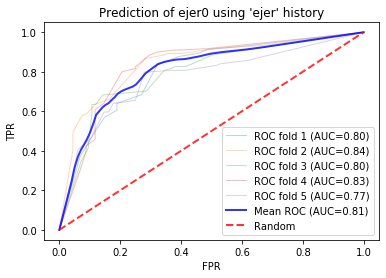

In [242]:
run_cv(inputdf, qf, "ejer0BC", 1, 5, "Prediction of ejer0 using 'ejer' history")
#predict_NBA_scores(qf, "ejer0BC", 1, testdf, testdf)

### NBA - Prediction of "ejer0" using "ejer" history and "obesity"

In [248]:
rdata = ndata[(ndata.ejer0B != "N") & (ndata.ejer1B != "N") & (ndata.ejer5B != "N") & (ndata.ejer10B != "N") & (ndata.ejer20B != "N")]
qf = ["ejer1B", "ejer5B", "ejer10B", "ejer20B", "obesity"]
inputdf = rdata[qf]
inputdf["ejer0BC"] = rdata["ejer0B"].replace("B", 1).replace("A", 0)
inputdf.head()

/home/vicente/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ejer1B,ejer5B,ejer10B,ejer20B,obesity,ejer0BC
dp_folio,,,,,,
1,B,B,B,B,1,1
2,B,A,A,A,0,1
4,B,A,A,A,1,1
5,B,B,B,B,0,1
6,B,B,B,B,0,0


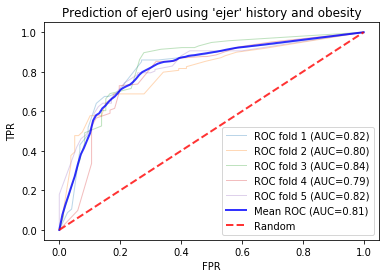

In [249]:
run_cv(inputdf, qf, "ejer0BC", 1, 5, "Prediction of ejer0 using 'ejer' history and obesity")

### NBA - Prediction of "condi0" using "condi" history

In [243]:
rdata = ndata[(ndata.condi0B != "N") & (ndata.condi1B != "N") & (ndata.condi5B != "N") & (ndata.condi10B != "N") & (ndata.condi20B != "N")]
qf = ["condi1B", "condi5B", "condi10B", "condi20B"]
inputdf = rdata[qf]
inputdf["condi0BC"] = rdata["condi0B"].replace("B", 1).replace("A", 0)
inputdf.head()

/home/vicente/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,condi1B,condi5B,condi10B,condi20B,condi0BC
dp_folio,,,,,
1,A,A,A,A,1
2,A,A,A,A,0
3,B,B,B,A,1
4,B,A,A,A,1
6,B,B,A,A,1


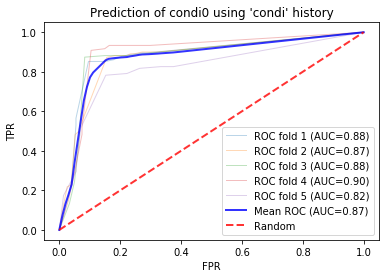

In [247]:
run_cv(inputdf, qf, "condi0BC", 1, 5, "Prediction of condi0 using 'condi' history")

### NBA - Prediction of "obesity" using "ejer" history

In [25]:
rdata = ndata[(ndata.ejer0B != "N") & (ndata.ejer1B != "N") & (ndata.ejer5B != "N") & (ndata.ejer10B != "N") & (ndata.ejer20B != "N")]
qf = ["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B"]
inputdf = rdata[qf]
inputdf["obesity"] = rdata["obesity"]
inputdf

/home/vicente/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ejer0B,ejer1B,ejer5B,ejer10B,ejer20B,obesity
dp_folio,,,,,,
1,B,B,B,B,B,1
2,B,B,A,A,A,0
4,B,B,A,A,A,1
5,B,B,B,B,B,0
6,A,B,B,B,B,0
...,...,...,...,...,...,...
1076,B,B,B,A,A,1
1077,A,A,B,B,B,0
1078,B,A,A,A,A,0


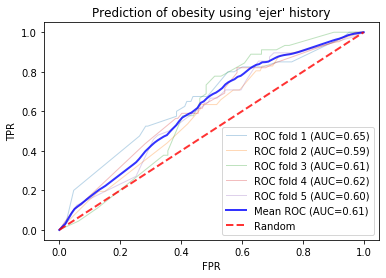

In [26]:
run_cv(inputdf, qf, "obesity", 1, 5, "Prediction of obesity using 'ejer' history")

### NBA - Prediction of "salud0" using "salud" history

In [230]:
rdata = ndata[(ndata.salud0B != "N") & (ndata.salud1B != "N") & (ndata.salud5B != "N") & (ndata.salud10B != "N") & (ndata.salud20B != "N")]
qf = ["salud1B", "salud5B", "salud10B", "salud20B"]
inputdf = rdata[qf]
inputdf["salud0BC"] = rdata["salud0B"].replace("B", 1).replace("A", 0)
inputdf

/home/vicente/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,salud1B,salud5B,salud10B,salud20B,salud0BC
dp_folio,,,,,
1,A,A,A,A,0
2,A,B,A,A,0
3,B,A,A,A,1
4,A,A,A,A,0
6,A,A,A,A,0
...,...,...,...,...,...
1076,A,A,A,A,0
1077,A,A,A,A,0
1078,A,A,A,A,0


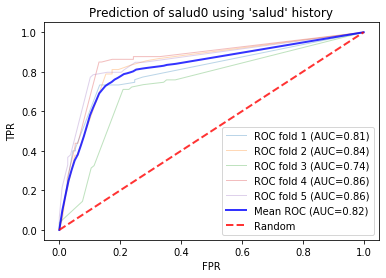

In [231]:
run_cv(inputdf, qf, "salud0BC", 1, 5, "Prediction of salud0 using 'salud' history")

In [152]:
testdf.iloc[16].name

19

In [153]:
nd = pd.DataFrame()

In [31]:
#test = user_scores.drop(columns=["ejer0B"])

In [32]:
test.iloc[20]

ejer1B      0.284449
ejer5B       0.18602
ejer10B    0.0104837
ejer20B   -0.0547195
obesity            1
Name: 25, dtype: object

In [39]:
user_scores.head()

,ejer0B,ejer1B,ejer5B,ejer10B,ejer20B,ejer0BC
dp_folio,,,,,,
1,0,1.306432,0.815778,0.501974,0.321327,1
2,0,1.306432,-0.647141,-0.374881,-0.263670,1
4,0,1.306432,-0.647141,-0.374881,-0.263670,1
5,0,1.306432,0.815778,0.501974,0.321327,1
6,0,1.306432,0.815778,0.501974,0.321327,0


In [110]:
pd.DataFrame(user_scores.sum(axis=1)).sort_values(by=[0], ascending=False)

,0
dp_folio,
910,1.820953
333,1.820953
740,1.820953
874,1.820953
536,1.820953
...,...
30,-1.356422
572,-1.356422
1052,-1.356422


### Tests

In [110]:
getScoreFull("ejerHistory","BB*B**","obesity", 1, rdata)

{'feat': 'ejerHistory',
 'cat': 'BB*B**',
 'class': 'obesity',
 'classcat': 1,
 'score': 0.1379995884993755,
 'nx': 265,
 'ncx': 67,
 'nc': 214}

In [94]:
rdatabin = rdata.replace("B", 1).replace("A", 0)

In [115]:
rdatabin["ejer0B"].sum()

579

In [121]:
buf = np.array(stringGenerator("", 2)).flatten()
posibilities = stringPadding("", buf, "****")

In [253]:
posibilities

NameError: name 'posibilities' is not defined

In [264]:
getScore("ejerHistory", "BBBBB*", "obesity", 1, ndata)

0.2414143336163289

In [50]:
# Get all the scores of the list of categories associated to a single feature
def getHistoriesScoresFromFeature(feature, catlist, classFeature, classCategory, data):
    scores = {}
    for category in catlist:
        #scores.append(getScore(feature, category, classFeature, classCategory, data))
        scores[category] = getScore(feature, category, classFeature, classCategory, data)
    return {feature: scores}

def getHistoriesScoresFromFeatureFull(feature, catlist, classFeature, classCategory, data):
    scores = []
    for category in catlist:
        #scores.append(getScore(feature, category, classFeature, classCategory, data))
        scores.append(getScoreFull(feature, category, classFeature, classCategory, data))
    return pd.DataFrame(scores)

In [46]:
histories = ["AAAAA*", "BBBBB*"]
getHistoriesScoresFromFeature("ejerHistory", histories, "obesity", 1, ndata)

{'ejerHistory': {'AAAAA*': -0.5940562779157144, 'BBBBB*': 0.2414143336163289}}

In [51]:
getHistoriesScoresFromFeatureFull("ejerHistory", histories, "obesity", 1, ndata)

,feat,cat,class,classcat,score,nx,ncx,nc
0,ejerHistory,AAAAA*,obesity,1,-0.594056,147,19,228
1,ejerHistory,BBBBB*,obesity,1,0.241414,200,51,228


### GNB

In [345]:
cdata = groupListOfVariables(["ejer1B", "ejer5B", "ejer10B", "ejer20B"], "ejerHistory1_20", ndata)
cdata = cdata[(cdata.ejer0B != "N") & (cdata.ejer1B != "N") & (cdata.ejer5B != "N") & (cdata.ejer10B != "N") & (cdata.ejer20B != "N")]

In [346]:
histories = np.array(stringGenerator("", ["A", "B"], 4)).flatten()

In [347]:
cdata

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,dis_dia10B,dis_dia20B,dis_dia30B,AedadC,ejerHistory,condiHistory,estresHistory,saludHistory,dis_diaHistory,ejerHistory1_20
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,N,N,N,2,BBBBBA,BAAAAA,ABANNB,AAAAAA,BBANNN,BBBB
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,B,A,B,1,BBAAAB,AAAAAA,BBABBB,AABAAA,ABBBAB,BAAA
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,A,A,A,3,BBAAAA,BBAAAA,BABBBN,AAAAAA,AAAAAA,BAAA
5,M,42,4,EM,Sec,3,1,2,2,2,...,N,N,N,2,BBBBBB,BBAANN,BBBANN,AABBNN,BBBNNN,BBBB
6,F,47,5,Int,Lic,2,2,-1,3,0,...,A,A,A,2,ABBBBB,BBBAAA,AAABBB,AAAAAA,BBAAAA,BBBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,F,43,5,Acade,Lic,4,2,-1,2,0,...,B,A,A,2,BBBAAA,BBBAAA,AAABBB,AAAAAA,BBBBAA,BBAA
1077,F,56,7,Jef,Sec,3,2,-1,4,4,...,A,A,A,2,AABBBA,BBBBBA,ABBBBB,AAAAAA,AAAAAA,ABBB
1078,M,63,8,Acade,Mast,3,1,2,2,3,...,A,A,A,3,BAAAAA,AAAAAA,BBBBBB,AAAAAA,AAAAAA,AAAA


In [300]:
# NOTE: We still have to filter out the 'N's
getHistoriesScoresFromFeature("ejerHistory1_20", histories, "ejer0B", "B", cdata)

{'ejerHistory1_20': {'AAAA': -1.490836583566111,
  'AAAB': -1.987043399707585,
  'AABA': -0.940699539585232,
  'AABB': -0.7843534691945383,
  'ABAA': -1.163843090899442,
  'ABAB': -0.9815215341054874,
  'ABBA': -1.3579991053403995,
  'ABBB': -1.1274754467285668,
  'BAAA': 0.8936195440616187,
  'BAAB': 0.7332768939864395,
  'BABA': -0.0652308022313322,
  'BABB': 0.37660195004770713,
  'BBAA': 1.5947593893655994,
  'BBAB': 2.301892811900285,
  'BBBA': 1.4511166871367565,
  'BBBB': 1.7365790028502242}}

In [86]:
# Generalize the "Histories" part
def predict_GNB_scores(query_history, classFeature, classCategory, Xt, Xv):
    # Get the dictionary of scores, in relation to classFeature-classCategory
    scores_dictionary = getHistoriesScoresFromFeature(query_history, histories, classFeature, classCategory, Xt)
    
    # Use the dictionary of scores to calculate the associated sum of scores for every user
    user_scores = getScoresPerUser([query_history], scores_dictionary, Xv)
    return pd.DataFrame(user_scores.sum(axis=1))

In [301]:
gnbtest = predict_GNB_scores("ejerHistory1_20", "ejer0B", "B", cdata, cdata)
gnbtest

,0
dp_folio,
1,1.736579
2,0.893620
4,0.893620
5,1.736579
6,1.736579
...,...
1076,1.594759
1077,-1.127475
1078,-1.490837


In [304]:
cdata.loc[1].ejerHistory1_20

'BBBB'

In [27]:
def run_cv_gnb(X, qF, cF, cC, folds, plot_name):
    
    kf = KFold(n_splits = 5, shuffle=True)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    j = 0
    for train_index, test_index in kf.split(X):
        train = pd.DataFrame()
        test = pd.DataFrame()
        for index in train_index:
            name = X.iloc[index].name
            train = train.append(X.loc[name])
        for index in test_index:
            name = X.iloc[index].name
            test = test.append(X.loc[name])
        
        Yprob = predict_GNB_scores(qF, cF, cC, train, test)
        
        fpr, tpr, thresholds = roc_curve(test[cF].values, Yprob.values[:, -1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label="ROC fold %d (AUC=%0.2f)" % (j + 1, roc_auc))
        j = j + 1
                
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, lw=2, color='b', alpha=0.8, label='Mean ROC (AUC=%0.2f)' % (mean_auc))
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(plot_name)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
           label='Random', alpha=.8)
    plt.legend(loc="lower right")
    plt.show()

In [352]:
qf = "ejerHistory1_20"
inputdf = pd.DataFrame()
inputdf[qf] = cdata[qf]
inputdf["ejer0BC"] = cdata["ejer0B"].replace("B", 1).replace("A", 0)
inputdf

,ejerHistory1_20,ejer0BC
dp_folio,,
1,BBBB,1
2,BAAA,1
4,BAAA,1
5,BBBB,1
6,BBBB,0
...,...,...
1076,BBAA,1
1077,ABBB,0
1078,AAAA,1


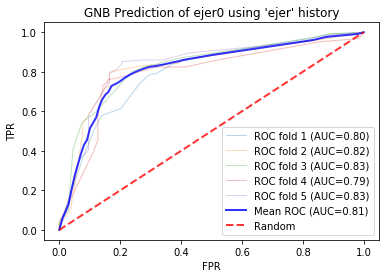

In [353]:
run_cv_gnb(inputdf, qf, "ejer0BC", 1, 5, "GNB Prediction of ejer0 using 'ejer' history")

In [372]:
cdata = groupListOfVariables(["ejer1B", "ejer5B", "ejer10B"], "ejerHistory1_10", ndata)
cdata = cdata[(cdata.ejer0B != "N") & (cdata.ejer1B != "N") & (cdata.ejer5B != "N") & (cdata.ejer10B != "N") & (cdata.ejer20B != "N")]
histories = np.array(stringGenerator("", ["A", "B"], 3)).flatten()

In [373]:
cdata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,dis_dia10B,dis_dia20B,dis_dia30B,AedadC,ejerHistory,condiHistory,estresHistory,saludHistory,dis_diaHistory,ejerHistory1_10
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,N,N,N,2,BBBBBA,BAAAAA,ABANNB,AAAAAA,BBANNN,BBB
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,B,A,B,1,BBAAAB,AAAAAA,BBABBB,AABAAA,ABBBAB,BAA
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,A,A,A,3,BBAAAA,BBAAAA,BABBBN,AAAAAA,AAAAAA,BAA
5,M,42,4,EM,Sec,3,1,2,2,2,...,N,N,N,2,BBBBBB,BBAANN,BBBANN,AABBNN,BBBNNN,BBB
6,F,47,5,Int,Lic,2,2,-1,3,0,...,A,A,A,2,ABBBBB,BBBAAA,AAABBB,AAAAAA,BBAAAA,BBB


In [376]:
qf = "ejerHistory1_10"
inputdf = pd.DataFrame()
inputdf[qf] = cdata[qf]
inputdf["ejer0BC"] = cdata["ejer0B"].replace("B", 1).replace("A", 0)
inputdf

,ejerHistory1_10,ejer0BC
dp_folio,,
1,BBB,1
2,BAA,1
4,BAA,1
5,BBB,1
6,BBB,0
...,...,...
1076,BBA,1
1077,ABB,0
1078,AAA,1


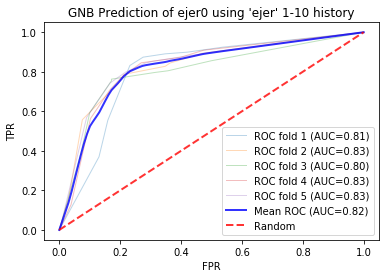

In [359]:
run_cv_gnb(inputdf, qf, "ejer0BC", 1, 5, "GNB Prediction of ejer0 using 'ejer' 1-10 history")

In [360]:
cdata = groupListOfVariables(["ejer1B", "ejer5B"], "ejerHistory1_5", ndata)
cdata = cdata[(cdata.ejer0B != "N") & (cdata.ejer1B != "N") & (cdata.ejer5B != "N")]
histories = np.array(stringGenerator("", ["A", "B"], 2)).flatten()

In [361]:
qf = "ejerHistory1_5"
inputdf = pd.DataFrame()
inputdf[qf] = cdata[qf]
inputdf["ejer0BC"] = cdata["ejer0B"].replace("B", 1).replace("A", 0)
inputdf.head()

,ejerHistory1_5,ejer0BC
dp_folio,,
1,BB,1
2,BA,1
3,BB,1
4,BA,1
5,BB,1


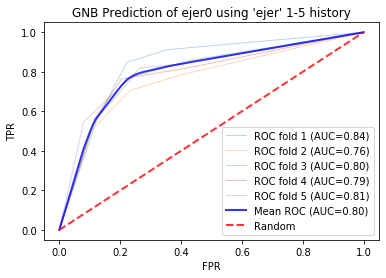

In [362]:
run_cv_gnb(inputdf, qf, "ejer0BC", 1, 5, "GNB Prediction of ejer0 using 'ejer' 1-5 history")

In [381]:
cdata = ndata[["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B", "obesity"]]
cdata = cdata.replace(1, "B").replace(0, "A")
cdata = groupListOfVariables(["ejer1B", "ejer5B", "ejer10B", "ejer20B", "obesity"], "ejerHistory1_20Ob", cdata)
cdata = cdata[(cdata.ejer1B != "N") & (cdata.ejer5B != "N") & (cdata.ejer10B != "N") & (cdata.ejer20B != "N")]
histories = np.array(stringGenerator("", ["A", "B"], 5)).flatten()

In [382]:
cdata

,ejer0B,ejer1B,ejer5B,ejer10B,ejer20B,obesity,ejerHistory1_20Ob
dp_folio,,,,,,,
1,B,B,B,B,B,B,BBBBB
2,B,B,A,A,A,A,BAAAA
4,B,B,A,A,A,B,BAAAB
5,B,B,B,B,B,A,BBBBA
6,A,B,B,B,B,A,BBBBA
...,...,...,...,...,...,...,...
1076,B,B,B,A,A,B,BBAAB
1077,A,A,B,B,B,A,ABBBA
1078,B,A,A,A,A,A,AAAAA


In [383]:
qf = "ejerHistory1_20Ob"
inputdf = pd.DataFrame()
inputdf[qf] = cdata[qf]
inputdf["ejer0BC"] = cdata["ejer0B"].replace("B", 1).replace("A", 0)
inputdf.head()

,ejerHistory1_20Ob,ejer0BC
dp_folio,,
1,BBBBB,1
2,BAAAA,1
4,BAAAB,1
5,BBBBA,1
6,BBBBA,0


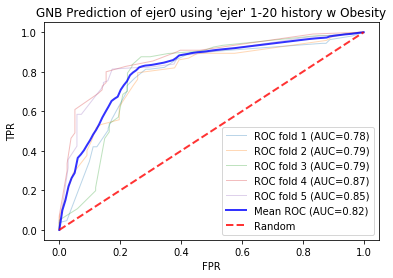

In [384]:
run_cv_gnb(inputdf, qf, "ejer0BC", 1, 5, "GNB Prediction of ejer0 using 'ejer' 1-20 history w Obesity")

In [385]:
cdata = groupListOfVariables(["ejer1B"], "ejerHistory1", ndata)
cdata = cdata[(cdata.ejer1B != "N")]
histories = np.array(stringGenerator("", ["A", "B"], 1)).flatten()

In [387]:
qf = "ejerHistory1"
inputdf = pd.DataFrame()
inputdf[qf] = cdata[qf]
inputdf["ejer0BC"] = cdata["ejer0B"].replace("B", 1).replace("A", 0)
inputdf

,ejerHistory1,ejer0BC
dp_folio,,
1,B,1
2,B,1
3,B,1
4,B,1
5,B,1
...,...,...
1076,B,1
1077,A,0
1078,A,1


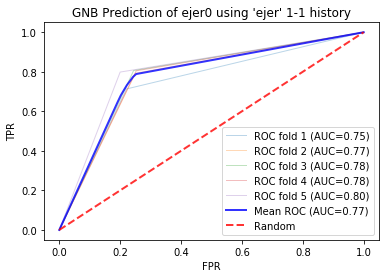

In [388]:
run_cv_gnb(inputdf, qf, "ejer0BC", 1, 5, "GNB Prediction of ejer0 using 'ejer' 1-1 history")

In [79]:
cdata = ndata[["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B", "obesity"]]
cdata = groupListOfVariables(["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B"], "ejerHistory0_20", cdata)
cdata = cdata[(cdata.ejer0B != "N") & (cdata.ejer1B != "N") & (cdata.ejer5B != "N") & (cdata.ejer10B != "N") & (cdata.ejer20B != "N")]
histories = np.array(stringGenerator("", ["A", "B"], 5)).flatten()

In [80]:
qf = "ejerHistory0_20"
inputdf = pd.DataFrame()
inputdf[qf] = cdata[qf]
inputdf["obesity"] = cdata["obesity"]
inputdf.head()

,ejerHistory0_20,obesity
dp_folio,,
1,BBBBB,1
2,BBAAA,0
4,BBAAA,1
5,BBBBB,0
6,ABBBB,0


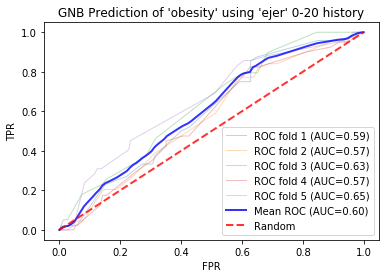

In [71]:
run_cv_gnb(inputdf, qf, "obesity", 1, 5, "GNB Prediction of 'obesity' using 'ejer' 0-20 history")

### Decile analysis

In [75]:
#getHistoriesScoresFromFeature(query_history, histories, classFeature, classCategory, Xt)
#scores_dec = getHistoriesScoresFromFeature("ejerHistory0_20", histories, "obesity", 1, inputdf)
histories = np.array(stringGenerator("", ["A", "B"], 5)).flatten()

In [ ]:
scores_dec = getHistoriesScoresFromFeatureFull("ejerHistory0_20", histories, "obesity", 1, inputdf)

In [56]:
scores_dec.to_csv("score_analysis/scores_obesity_ejer0-20_without_smoothing.csv")

In [65]:
scores_dec = getHistoriesScoresFromFeatureFull("ejerHistory0_20", histories, "obesity", 1, inputdf)

In [72]:
scores_dec.sort_values(by=["score"])
scores_dec.to_csv("score_analysis/scores_obesity_ejer0-20_with_smoothing.csv")

In [87]:
#predict_GNB_scores(query_history, classFeature, classCategory, Xt, Xv)
gnb_scores = predict_GNB_scores("ejerHistory0_20", "obesity", 1, inputdf, inputdf)

In [92]:
gnb_scores["obesity"] = inputdf["obesity"]

In [93]:
gnb_scores.score

,0,obesity
dp_folio,,
1,0.169617,1
2,0.350458,0
4,0.350458,1
5,0.169617,0
6,0.535862,0
...,...,...
1076,0.869006,1
1077,0.083877,0
1078,0.338036,0


In [166]:
results = gnb_scores.copy()
sorted_results = results.sort_values(by=[0], ascending=False)
bins = np.array_split(sorted_results, 10)

In [204]:
frequencies = []
for bin in range(len(bins)):
    frequencies.append(bins[bin]["obesity"].sum())

In [205]:
frequencies

[40, 27, 24, 30, 22, 26, 16, 14, 11, 3]

In [186]:
expected = np.repeat(int(results["obesity"].sum() * len(bins[0]) / len(results["obesity"])), 10)

In [187]:
expected

array([21, 21, 21, 21, 21, 21, 21, 21, 21, 21])

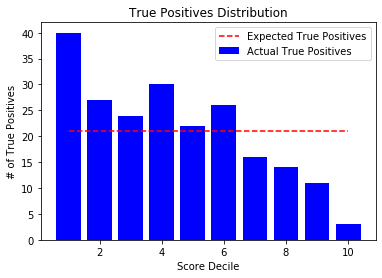

In [188]:
plt.bar(np.arange(1, 11, 1), frequencies, color='b', label="Actual True Positives")
plt.plot(np.arange(1, 11, 1), expected, color='r', linestyle='dashed', label="Expected True Positives")
plt.legend(loc="upper right")
plt.xlabel("Score Decile")
plt.ylabel("# of True Positives")
plt.title("True Positives Distribution")
plt.show()

In [217]:
# Function to plot the score distribution of the classified data, by deciles
def plotScoreDistribution(scores, classFeature, num_bins, name):
    # Sort by score and split the data into buckets (deciles)
    results = scores.copy()
    sorted_results = results.sort_values(by=[0], ascending=False)
    bins = np.array_split(sorted_results, num_bins)
    
    # Get the number of true positives by decile
    frequencies = []
    for binid in range(len(bins)):
        frequencies.append(bins[binid][classFeature].sum())
    
    # Get the expected value of true positives by decile, if the classification was made randomly
    expected = np.repeat(int(results[classFeature].sum() * len(bins[0]) / len(results[classFeature])), num_bins)
    
    # Plot the results
    plt.bar(np.arange(1, num_bins + 1, 1), frequencies, color='b', label="Actual True Positives")
    plt.plot(np.arange(1, num_bins + 1, 1), expected, color='r', linestyle='dashed', label="Expected True Positives")
    plt.legend(loc="upper right")
    plt.xlabel("Score Decile")
    plt.ylabel("# of True Positives")
    plt.title("True Positives Distribution - " + name)
    plt.show()

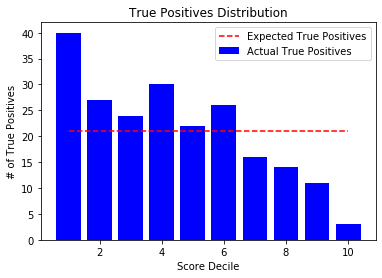

In [216]:
plotScoreDistribution(gnb_scores, "obesity", 10)